In [1]:
from IPython.display import Math
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

%matplotlib inline
style.use('fivethirtyeight')

In [2]:
Math(r'm = \frac{\overline{X} \cdot \overline{Y} - \overline{XY}}{(\overline{X})^2 - \overline{X^2}}')

<IPython.core.display.Math object>

In [3]:
Math(r'b = \overline{Y} - m \overline{X}')

<IPython.core.display.Math object>

In [4]:
def best_fit_slope_and_intercept(xs, ys):
    m = (
         ((mean(xs) * mean(ys)) - mean(xs*ys))
         / 
         ((mean(xs))**2 - mean(xs**2))
        )
    b = mean(ys) - m*mean(xs)
    return m, b

In [5]:
Math(r'r^2 = 1 - \frac{SE\hat{y}}{SE\overline{y}}')

<IPython.core.display.Math object>

In [6]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficcient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [7]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val+random.randrange(-variance, variance)
        ys.append(y)
        if correlation:
            if correlation == 'pos':
                val += step
            elif correlation == 'neg':
                val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [8]:
xs, ys = create_dataset(40, 10, 2, 'pos')

m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs]

predict_x = 45
predict_y = (m*predict_x)+b

r_squared = coefficcient_of_determination(ys, regression_line)
r_squared

0.94279566358685929

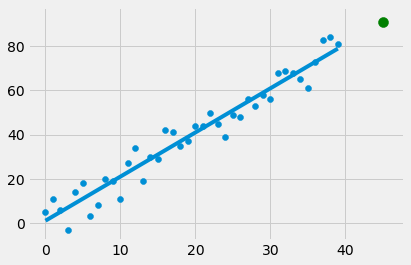

In [9]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x, predict_y, s=100, color="green")
plt.show()